## Data Exploration

In [17]:
# Importing important libraries
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

df = pd.read_csv('breast-cancer-wisconsin.data.txt') 

display(df.head())

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
display(df.describe())

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Data Preparation

In [19]:
df.replace('?', -999999, inplace=True) # replacing the invalid records with dummy value that will be scaled after then
df.drop(['id'], 1, inplace=True)

X = df.drop(['class'], 1)
Y = df['class']

all_records = df.shape[0]
benign_records = df[df['class'] == 2].shape[0]
maligant_records = df[df['class'] == 4].shape[0]

print("We have {} records".format(all_records))
print("We have {} maligant records".format(maligant_records))
print("We have {} benign records".format(benign_records))
print("The maligant perentage is {:.2f} %".format(maligant_records / all_records * 100))
print("The benign perentage is {:.2f} %".format(benign_records / all_records * 100))

We have 699 records
We have 241 maligant records
We have 458 benign records
The maligant perentage is 34.48 %
The benign perentage is 65.52 %


## Shuffle and split data

In [20]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)    

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 559 samples.
Testing set has 140 samples.


## Model Selection

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=7) # Initializing the classifier

clf.fit(X_train, y_train) # fitting the data

y_pred = clf.predict(X_test) # predicting

### Models evaluation 

Logistic regression fbeta score 87.72 

Normalized confusion matrix
[[0.89010989 0.10989011]
 [0.24489796 0.75510204]]


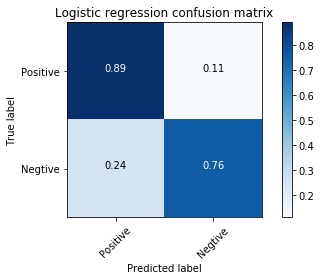

In [22]:
from sklearn.metrics import fbeta_score, confusion_matrix
import matplotlib.pyplot as plt
import visuals as vs

my_fbeta_score = fbeta_score(y_test, y_pred, beta=0.7, pos_label=2) # Calculating fbeta score and push it to the recall side by setting the beta parameter close to 1.
my_conf_matrix = confusion_matrix(y_test, y_pred) # Calculating the confussion matrix

print ("Logistic regression fbeta score {:.2f} \n".format(my_fbeta_score*100)) # reporting the fbeta score

# plotting the confussion matrix
vs.plot_confusion_matrix(my_conf_matrix, classes=['Positive', 'Negtive'], normalize=True, title="Logistic regression confusion matrix")

In [23]:
# Defining the function that will return thhe result of the patient

def predict_cancer(clf, arr):
    results = clf.predict(arr.reshape(1, -1))
    
    return results

## Predicting results

In [24]:
my_arr = np.array([9,5,5,4,4,5,4,3,3]) # <=== pass the features array here

result = predict_cancer(clf, my_arr)

if result == 2:
    print("The tumor is benign")
elif result == 4:
    print("The tumor is malignant")

The tumor is benign
